# Data Exploration + Tidying

In [ ]:
import pandas as pd 
import datetime as datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
import itertools as it

In [443]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import recall_score, accuracy_score

In [2]:
grow_off = pd.read_csv('../../data/grow-off.csv')

In [3]:
planting = pd.read_csv('../../data/planting.csv')

## Harvest Table Data Prep

In [4]:
harvest = pd.read_csv('../../data/harvest.csv')
harvest_columns = enumerate(harvest.columns, start = 0)
print(list(harvest_columns))

[(0, 'Unnamed: 0'), (1, 'Todays date:'), (2, 'Harvest date:'), (3, 'Day of week:'), (4, 'Data entry done by:'), (5, 'Product:'), (6, 'Transplant date:'), (7, 'Grow-Off age:'), (8, '(Harvest) Float  #:'), (9, 'Lot #:'), (10, 'Tower location:'), (11, 'Level location:'), (12, 'Total floats harvested:'), (13, '# of plants on Float / Flat:'), (14, 'Total weight for floats: (grams)'), (15, 'Total weight for floats: (pounds)'), (16, 'Avg weight per float:'), (17, 'Avg weight per plant:'), (18, 'Are any glass objects inside the tote when packing:'), (19, 'Harvest station and totes were inspected during Harvest:')]


In [5]:
harvest = harvest.drop(harvest.columns[[1,3,4,6,9,14,15,16,18,19]], axis = 1)

In [6]:
harvest['Harvest date:']= pd.to_datetime(harvest['Harvest date:'])

In [7]:
harvest = harvest.groupby('Product:').filter(lambda x : len(x)>40)

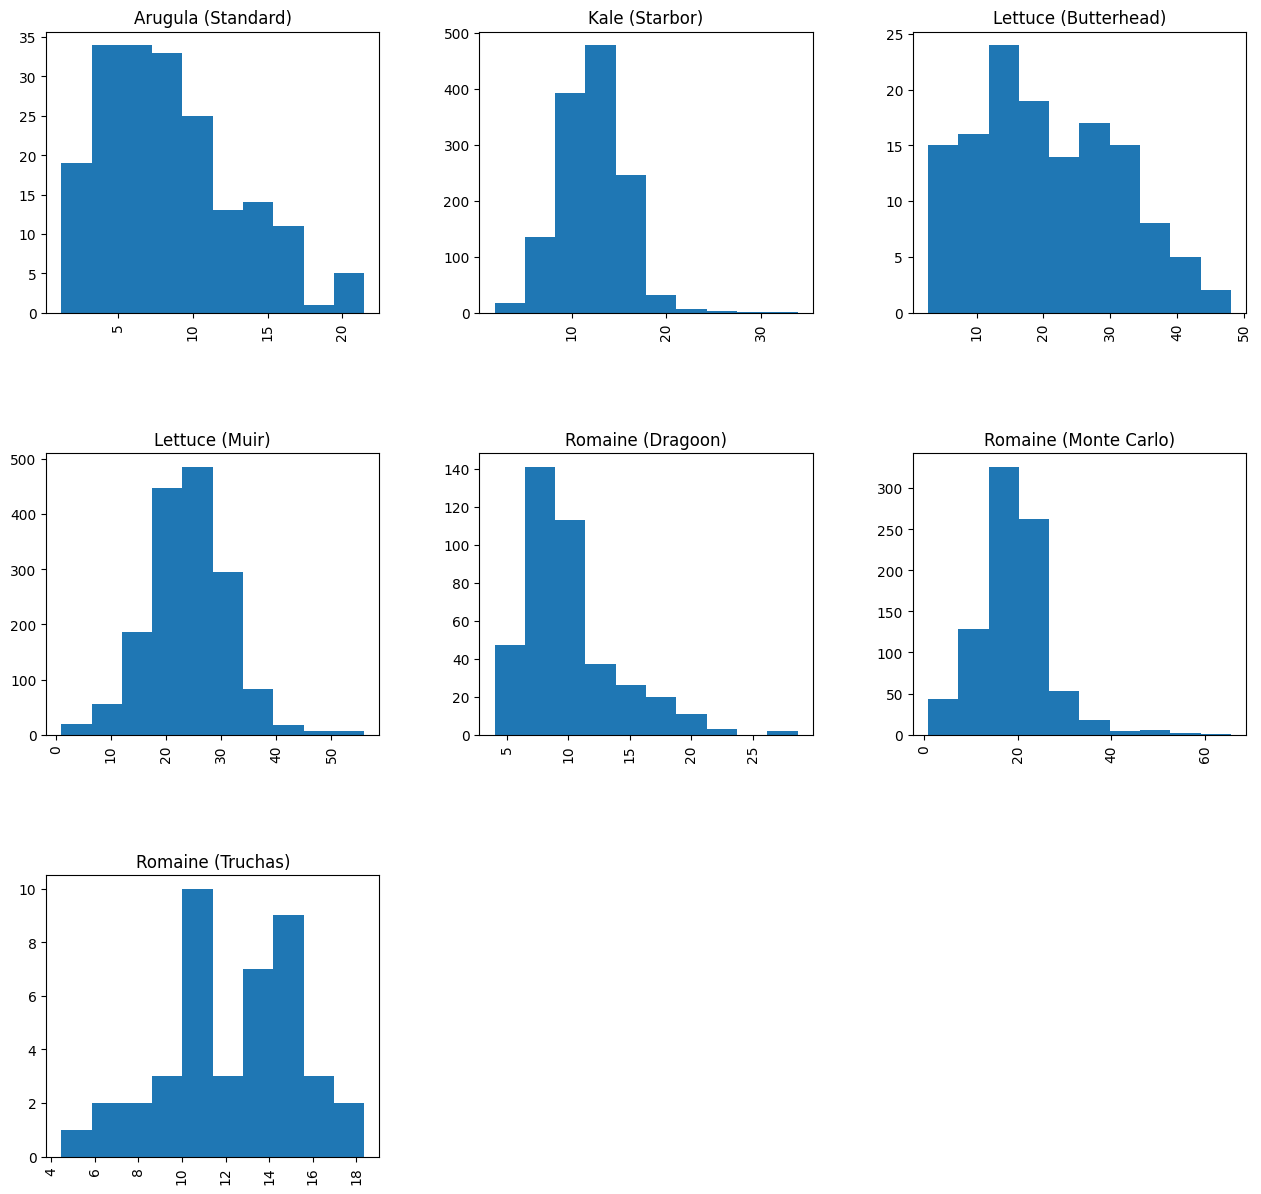

In [8]:
weight_plots = harvest['Avg weight per plant:'].hist(by=harvest['Product:'], figsize=(15,15))

In [9]:
#sns.regplot(x='Grow-Off age:', y='Avg weight per plant:', data=harvest)
#sns.pairplot(harvest, height=2)
plt.show()

harvest['Tower location:'].value_counts()
harvest.drop(harvest.columns[[0]], axis=1, inplace=True)

In [10]:
harvest.rename(columns ={'Harvest date:': 'Date'}, inplace=True)


In [11]:
g1_towers = ['Tower 1', 'Tower 2', 'Tower 3', 'Tower 4', 'Tower 5', 'Tower 6', 'Tower 7', 'Tower 8']
g2_towers = ['Tower 9', 'Tower 10', 'Tower 11', 'Tower 12', 'Tower 13', 'Tower 14,' 'Tower 15', 'Tower 16', 'Tower 17']
g3_towers = ['Tower 17', 'Tower 18', 'Tower 19', 'Tower 20', 'Tower 21', 'Tower 22', 'Tower 23', 'Tower 24']

harvest_g1 = harvest.loc[harvest['Tower location:'].isin(g1_towers)]
harvest_g2 = harvest.loc[harvest['Tower location:'].isin(g2_towers)]
harvest_g3 = harvest.loc[harvest['Tower location:'].isin(g3_towers)]

## Extracting Water Data conditions

In [162]:
def process_group(groupdata):
    pass

In [163]:
#Assuming the same water conditionos on group1 & group2 in room1 
group_1 = pd.read_csv('../../data/groupe1.csv', header=1, low_memory=False)
group_2 = pd.read_csv('../../data/group3,4.csv', header=1, low_memory=False)
group_3 = pd.read_csv('../../data/groupe3.csv', header=1, low_memory= False)

In [ ]:
def process_group(groupdata):
    groupdata['Date']= pd.to_datetime(groupdata['Date'])
    groupdata.drop(0, inplace=True)
    group_one['Date'] = group_one['Date'].apply(lambda x: x.strftime("%d/%m/%y"))
    group_one['Date']= pd.to_datetime(group_one['Date'])
    #take care of non numerical values (empty, NaN, symbols)
    #----Here
    # for numerical columns convert to float
    for x in groupdata:
      groupdata[x] = groupdata[x].astype(float)
    pass

### Group1

In [165]:
group_one = group_1.drop(group_1.columns[[2,4,6,8,10,15,16,17,18,19,20,24,25,26,27,28,29,30,31]], axis = 1)

#raw_data['Mycol'] =  pd.to_datetime(raw_data['Mycol'], format='%d%b%Y':%H:%M:%S.%f')
group_one['Date']= pd.to_datetime(group_one['Date'])
group_one.drop(0, inplace=True)

In [166]:
group_one['Date'] = group_one['Date'].apply(lambda x: x.strftime("%d/%m/%y"))

In [167]:
group_one['Date']= pd.to_datetime(group_one['Date'])

In [464]:
#group_one.isnull().sum().sort_values(ascending=False) 
#group_one.isnull().sum().sort_values(ascending=False)/len(group_one) 
group_one.columns

Index(['Date', 'nutriments (S21)', 'Water Temp (S22)', 'pH (S23)',
       'twr  level (in " S31) ', 'Dissolved O2', 'Flowswitch (D1)',
       'tower valv (R1)', 'tower pump (R2)', 'Lvl ntrlck (R3)', 'nutA&B (A42)',
       'pH- Pump (A43)', 'pH+ Pump (A44)'],
      dtype='object')

In [170]:
# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="most_frequent") 

# Call the "fit" method on the object
imputer.fit(group_one[['Dissolved O2']]) 

# Call the "transform" method on the object
group_one['Dissolved O2'] = imputer.transform(group_one[['Dissolved O2']]) 

# The max is stored in the transformer's memory
imputer.statistics_ 

array(['-0.93'], dtype=object)

In [172]:
group_one_lean = group_one.iloc[:,0:6]

In [173]:
G1_n_col = ['nutriments (S21)', 'Water Temp (S22)','Dissolved O2']

In [174]:
group_one_lean['Dissolved O2'].replace('-', -0.93 )
group_one_lean['Dissolved O2'].eq('-').sum()
group1_lean = group_one_lean.drop(10505)
group1_lean['Dissolved O2'].replace('-', '-0.93', inplace=True)

1        -0.93
2        -0.93
3        -0.93
4        -0.93
5        -0.93
         ...  
29603    -0.92
29604    -0.92
29605    -0.92
29606    -0.92
29607    -0.92
Name: Dissolved O2, Length: 29607, dtype: object

In [175]:
group1_lean = group_one_lean.drop(10505)

In [179]:
for x in G1_n_col:
  group1_lean[x] = group1_lean[x].astype(float)

In [181]:
date_water = group1_lean.groupby('Date').mean()

In [182]:
group1_harvest = pd.merge(harvest_g1, date_water, on='Date', how='left')

In [183]:
imputer = SimpleImputer(strategy="mean") 

# Call the "fit" method on the object
imputer.fit(group1_harvest[['Grow-Off age:']]) 

# Call the "transform" method on the object
group1_harvest['Grow-Off age:'] = imputer.transform(group1_harvest[['Grow-Off age:']])

# The max is stored in the transformer's memory
imputer.statistics_ 

array([20.93746797])

In [184]:
no_info = group1_harvest.loc[group1_harvest['Water Temp (S22)'].isna()]
G1_harvest_clean = group1_harvest.dropna()

In [185]:
G1_harvest_clean.rename(columns={'Date': 'Harvest date:', 'Tower location:': 'Tower:', 'Level location:':'Level:'}, inplace = True )

/var/folders/tk/7yqwh_tj6wj3gmqp0p20bnm80000gq/T/ipykernel_15103/3888274138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  G1_harvest_clean.rename(columns={'Date': 'Harvest date:', 'Tower location:': 'Tower:', 'Level location:':'Level:'}, inplace = True )


In [ ]:
G1_harvest_clean.columns

### Group2

In [ ]:
group_2 = pd.read_csv('../../data/group3,4.csv', header=1, low_memory=False)

In [466]:
group_2

,Date,G3 nutAB (S11),G3 Temp (S12),G3 pH (S13),G3 Temp (S14),G4 nutAB (S21),G4 Temp (S22),G4 pH (S23),g4 Temp (S24),G4 dO (S31),...,G4 pump (R24),Manual (R31),Manual (R32),Manual (R33),Manual (R34),G3 nAB pmp (A41),G3 Ph pump (A42),G4 Ph pump (A43),G4 nAB PMP (A44),Flow Prop (C1)
0,NaN,mS/cm,°C,NaN,°C,mS/cm,°C,NaN,°C,PPM,...,NaN,%,%,%,%,%,%,%,%,%
1,08-Sep-2022 16:30:00,1.07,20.6,6.41,19.9,1.78,20.8,6.32,20.2,5.59,...,On,0.0,0.0,0.0,0.0,0.0,0.0,2.4,71.4,0.0
2,08-Sep-2022 17:00:00,1.07,21.1,6.41,20.4,1.80,20.9,6.31,20.3,5.56,...,On,0.0,0.0,0.0,0.0,0.0,0.0,1.2,8.6,0.0
3,08-Sep-2022 17:30:00,1.07,21.5,6.41,20.8,1.80,21.0,6.27,20.4,5.43,...,On,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.9,0.0
4,08-Sep-2022 18:00:00,1.06,21.8,6.42,21.1,1.77,21.1,6.33,20.5,5.43,...,On,0.0,0.0,0.0,0.0,0.0,0.0,3.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,13-Dec-2022 14:00:00,1.79,23.6,5.80,22.7,1.72,21.1,5.82,20.6,4.55,...,On,0.0,0.0,0.0,0.0,24.4,0.8,2.0,100.0,0.0
4604,13-Dec-2022 14:30:00,1.80,23.5,5.80,22.6,1.71,21.2,5.84,20.6,4.56,...,On,0.0,0.0,0.0,0.0,16.0,1.2,4.2,100.0,0.0
4605,13-Dec-2022 15:00:00,1.80,23.7,5.80,22.8,1.63,20.6,5.85,19.9,4.67,...,On,0.0,0.0,0.0,0.0,0.0,0.4,4.5,100.0,0.0
4606,13-Dec-2022 15:30:00,1.80,23.6,5.80,22.7,1.62,20.7,5.85,19.9,4.66,...,On,0.0,0.0,0.0,0.0,4.4,0.7,4.7,100.0,0.0


In [ ]:
group_2.head(20)
group_2 = group_2.drop(group_2.columns[[2,4,6,8,10,15,16,17,18,19,20,24,25,26,27,28,29,30,31]], axis = 1)

In [ ]:
group_two = group_2

In [ ]:
group_two['Date'] = pd.to_datetime(group_two['Date'])
group_two.drop(0, inplace=True)

In [463]:
group_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4607 entries, 1 to 4607
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              4607 non-null   datetime64[ns]
 1   G3 nutAB (S11)    4607 non-null   object        
 2   G3 pH (S13)       4607 non-null   float64       
 3   G4 nutAB (S21)    4607 non-null   object        
 4   G4 pH (S23)       4607 non-null   float64       
 5   G4 dO (S31)       4607 non-null   object        
 6   G3 tnk LVL (S33)  4607 non-null   object        
 7   G3 dO (S34)       4607 non-null   object        
 8   G3 Flow (D1)      4607 non-null   object        
 9   G4 flow (D2)      4607 non-null   object        
 10  - (R23)           4607 non-null   object        
 11  G4 pump (R24)     4607 non-null   object        
 12  Manual (R31)      4607 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 468.0+ KB


In [467]:
# for x in group_two.columns:
#     group_two = group_two.astype(float)

## Plant Health

In [36]:
plant_health = pd.read_csv('../../data/planthealth.csv')
plant_health

,Unique ID:,Harvest date:,Tower:,Level:,Harvested crop:,Crop age:,Average float weight:,Plant health issues:,Black heart level:,Black heart severity:,...,Total plants lost:,Comments:,Average float weight: Post QC,QC Weight Lost:,Full floats tossed:,QC needed:,% of weight lost:,Plant Loss: Algae,Plant Loss: No growth,Plant Loss: Fallen on ground
0,9c9502b8,9/23/2021,Tower 6,Level 6,Kale (Starbor),21.0,NaN,Bugs,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,068e4b0a,9/23/2021,Tower 1,Level 4,Kale (Starbor),21.0,NaN,**Healthy crop**,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6030bce2,9/23/2021,Tower 8,Level 7,Lettuce (Muir),21.0,NaN,Black hearts,3 - Black hearts found on 50% to 75% of floats,Severe (over 50% of plant),...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,db73f246,9/23/2021,Tower 1,Level 2,Lettuce (Muir),21.0,NaN,Algae,0 - No black hearts found during harvest,NaN,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0efb020a,9/23/2021,Tower 6,Level 4,Lettuce (Muir),21.0,NaN,Black hearts,1 - Black hearts found on 0% to 25% of floats,Minor (under 50% of plant),...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,22355c3e,11/29/2022,Tower 22,Level 3,Kale (Black Magic),22.0,956.90,"Root Health: ***Healthy*** , Plant Health: ***...",NaN,NaN,...,NaN,NaN,NaN,956.90,0.0,No,0.0,NaN,NaN,NaN
2889,d9b3483b,11/29/2022,Tower 15,Level 4,Kale (Starbor),21.0,922.22,"Root Health: ***Healthy*** , Plant Health: Yel...",NaN,NaN,...,14.0,NaN,NaN,922.22,0.0,No,0.0,NaN,6.0,3.0
2890,8450297e,11/29/2022,Tower 7,Level 1,Romaine (Monte Carlo),21.0,2550.81,"Root Health: ***Healthy*** , Plant Health: Yel...",2 - Black hearts found on 25% to 50% of floats,Minor (under 50% of plant),...,20.0,The post quality control weight was never subm...,NaN,2550.81,0.0,Yes,0.0,NaN,6.0,13.0
2891,5761dbf6,11/29/2022,Tower 4,Level 7,Lettuce (Muir),21.0,2688.93,"Root Health: ***Healthy*** , Plant Health: ***...",NaN,NaN,...,NaN,NaN,NaN,2688.93,0.0,No,0.0,NaN,NaN,NaN


In [37]:
plant_health.isnull().sum().sort_values(ascending=False) 

Plant Loss: Algae                2893
Plant Loss: Fallen on ground     2891
Plant Loss: No growth            2891
Average float weight: Post QC    2876
QC needed:                       2823
% of weight lost:                2763
Full floats tossed:              2761
QC Weight Lost:                  2757
Comments:                        2474
Black heart severity:            2157
Black heart level:               1555
Total plants lost:                771
Plant health issues:              592
Average float weight:             164
# floats harvested:                 8
Harvest date:                       2
Crop age:                           2
Harvested crop:                     2
Level:                              2
Tower:                              2
Unique ID:                          2
dtype: int64

In [38]:
plant_health.isnull().sum().sort_values(ascending=False)/len(group_one) 

Plant Loss: Algae                0.097713
Plant Loss: Fallen on ground     0.097646
Plant Loss: No growth            0.097646
Average float weight: Post QC    0.097139
QC needed:                       0.095349
% of weight lost:                0.093323
Full floats tossed:              0.093255
QC Weight Lost:                  0.093120
Comments:                        0.083561
Black heart severity:            0.072854
Black heart level:               0.052521
Total plants lost:               0.026041
Plant health issues:             0.019995
Average float weight:            0.005539
# floats harvested:              0.000270
Harvest date:                    0.000068
Crop age:                        0.000068
Harvested crop:                  0.000068
Level:                           0.000068
Tower:                           0.000068
Unique ID:                       0.000068
dtype: float64

In [39]:
print(list(enumerate(plant_health.columns)))

[(0, 'Unique ID:'), (1, 'Harvest date:'), (2, 'Tower:'), (3, 'Level:'), (4, 'Harvested crop:'), (5, 'Crop age:'), (6, 'Average float weight:'), (7, 'Plant health issues:'), (8, 'Black heart level:'), (9, 'Black heart severity:'), (10, '# floats harvested:'), (11, 'Total plants lost:'), (12, 'Comments:'), (13, 'Average float weight: Post QC'), (14, 'QC Weight Lost:'), (15, 'Full floats tossed:'), (16, 'QC needed:'), (17, '% of weight lost:'), (18, 'Plant Loss: Algae'), (19, 'Plant Loss: No growth'), (20, 'Plant Loss: Fallen on ground')]


In [40]:
plant_health = plant_health.drop(plant_health.columns[[0,6,13,14,15,16,17,18,19,20]], axis = 1)                             

In [41]:
plant_health.loc[plant_health['Plant health issues:'] == '**Healthy crop**', 'Black heart level:'] = "0"

In [42]:
plant_health.loc[plant_health['Plant health issues:'] == '**Healthy crop**', 'Black heart severity:'] = "0"

In [43]:
nodata = plant_health.loc[plant_health['Plant health issues:'].isnull()]

In [44]:
plant_health.loc[plant_health['Total plants lost:'] == '0.0', 'Plant health issues:'] = "**Healthy crop**"

In [45]:
# pd.set_option('display.max_rows', None)
plant_health['Harvest date:'] = pd.to_datetime(plant_health['Harvest date:'])
plant_health.rename(columns = {'Harvested crop:' : 'Product:'}, inplace= True)

In [46]:
plant_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Harvest date:          2891 non-null   datetime64[ns]
 1   Tower:                 2891 non-null   object        
 2   Level:                 2891 non-null   object        
 3   Product:               2891 non-null   object        
 4   Crop age:              2891 non-null   float64       
 5   Plant health issues:   2301 non-null   object        
 6   Black heart level:     1962 non-null   object        
 7   Black heart severity:  1879 non-null   object        
 8   # floats harvested:    2885 non-null   float64       
 9   Total plants lost:     2122 non-null   float64       
 10  Comments:              419 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 248.7+ KB


In [47]:
phealth_g1 = plant_health.loc[plant_health['Tower:'].isin(g1_towers)]
phealth_g2 = plant_health.loc[plant_health['Tower:'].isin(g2_towers)]
phealth_g3 = plant_health.loc[plant_health['Tower:'].isin(g3_towers)]

In [48]:
phealth_g1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2892
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Harvest date:          2275 non-null   datetime64[ns]
 1   Tower:                 2275 non-null   object        
 2   Level:                 2275 non-null   object        
 3   Product:               2275 non-null   object        
 4   Crop age:              2275 non-null   float64       
 5   Plant health issues:   1969 non-null   object        
 6   Black heart level:     1754 non-null   object        
 7   Black heart severity:  1680 non-null   object        
 8   # floats harvested:    2270 non-null   float64       
 9   Total plants lost:     1867 non-null   float64       
 10  Comments:              304 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 213.3+ KB


### Joining plant health on group info


In [49]:
data_group1 = pd.merge(G1_harvest_clean, phealth_g1, on= ['Harvest date:', 'Tower:', 'Level:', 'Product:'], how = 'left')

In [50]:
data_group1.isnull().sum()

Harvest date:                      0
Product:                           0
Grow-Off age:                      0
(Harvest) Float  #:                0
Tower:                             0
Level:                             0
Total floats harvested:            0
# of plants on Float / Flat:       0
Avg weight per plant:              0
nutriments (S21)                   0
Water Temp (S22)                   0
pH (S23)                           0
twr  level (in " S31)              0
Dissolved O2                       0
Crop age:                       1314
Plant health issues:            1587
Black heart level:              1779
Black heart severity:           1853
# floats harvested:             1319
Total plants lost:              1672
Comments:                       3147
dtype: int64

In [51]:
data_group1['Crop age'] = data_group1['Crop age:'].astype(float)
# for x in G1_n_col:
#   group1_lean[x] = group1_lean[x].astype(float)

In [52]:
data_group1.shape

(3424, 22)

In [53]:
# diff = data_group1.loc[data_group1['Grow-Off age:'] != data_group1['Crop age:']]
# diff.shape
# diff = diff[diff['Crop age:'].notna()]

## Air Data

In [54]:
air_data_csv = '../../data/air_data1.csv'
air_data = pd.read_csv(air_data_csv)

In [55]:
air_data.drop(columns={'Unnamed: 8'}, inplace= True)

air_data.iloc[4304:4353,:]= air_data.iloc[4304:4353,:].assign(Date = '1/2/2022')
air_data.iloc[4353:4402,:]= air_data.iloc[4353:4402,:].assign(Date = '2/2/2022')
air_data.iloc[4402:4450,:]= air_data.iloc[4402:4450,:].assign(Date = '3/2/2022')
air_data.iloc[4450:4499,:]= air_data.iloc[4450:4499,:].assign(Date = '4/2/2022')
air_data.iloc[4499:4547,:]= air_data.iloc[4499:4547,:].assign(Date = '5/2/2022')
air_data.iloc[4547:4595,:]= air_data.iloc[4547:4595,:].assign(Date = '6/2/2022')
air_data.iloc[4595:4643,:]= air_data.iloc[4595:4643,:].assign(Date = '7/2/2022')
air_data.iloc[4643:4671,:]= air_data.iloc[4643:4671,:].assign(Date = '8/2/2022')

In [56]:
air_data['Date'] = pd.to_datetime(air_data['Date'])
air_data['Date'] = air_data['Date'].apply(lambda x: x.strftime("%d/%m/%y"))
air_data['Date'] = pd.to_datetime(air_data['Date'])

In [57]:
# air_data.duplicated().sum()
# df_na = air_data[air_data.isna().any(axis=1)]
air_data.at[0,'Température 1 (◦C)'] = 24.10

In [58]:
air_data['Température 1 (◦C)'] = air_data['Température 1 (◦C)'].astype(float)

In [59]:
air_data = air_data.groupby('Date').mean()

/var/folders/tk/7yqwh_tj6wj3gmqp0p20bnm80000gq/T/ipykernel_15103/3609705892.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  air_data = air_data.groupby('Date').mean()


In [60]:
air_data1 = air_data.drop(columns = {'Température 2 (◦C)','Température 3 (◦C)', 
                                     'Humidité 2 (%)', 'Humidité 3 (%)'})
air_data2 = air_data.drop(columns = {'Température 1 (◦C)','Température 3 (◦C)', 
                                     'Humidité 1 (%)', 'Humidité 3 (%)'})
air_data3 = air_data.drop(columns = {'Température 1 (◦C)','Température 2 (◦C)', 
                                     'Humidité 1 (%)', 'Humidité 2 (%)'})

In [61]:
air_data1.reset_index(inplace=True)
air_data1.rename(columns = {'Date':'Harvest date:'}, inplace=True)

In [62]:
date_temp = air_data1.groupby('Harvest date:').mean()

### Adding air data (Humidity & Temparature) to the group info

In [237]:
full_data_group1 = pd.merge(data_group1 ,air_data1, on='Harvest date:', how ='left')

In [238]:
full_data_group1.shape

(3424, 24)

In [239]:
df = full_data_group1
print(list(enumerate(df.columns)))

[(0, 'Harvest date:'), (1, 'Product:'), (2, 'Grow-Off age:'), (3, '(Harvest) Float  #:'), (4, 'Tower:'), (5, 'Level:'), (6, 'Total floats harvested:'), (7, '# of plants on Float / Flat:'), (8, 'Avg weight per plant:'), (9, 'nutriments (S21)'), (10, 'Water Temp (S22)'), (11, 'pH (S23)'), (12, 'twr  level (in " S31) '), (13, 'Dissolved O2'), (14, 'Crop age:'), (15, 'Plant health issues:'), (16, 'Black heart level:'), (17, 'Black heart severity:'), (18, '# floats harvested:'), (19, 'Total plants lost:'), (20, 'Comments:'), (21, 'Crop age'), (22, 'Température 1 (◦C)'), (23, 'Humidité 1 (%)')]


In [240]:
df['Grow-Off age:'] = df['Grow-Off age:'].astype('int64')

In [241]:
df['Crop age'] = df['Crop age'].astype('Int64')

In [114]:
#df['Température 1 (◦C)'] = df['Température 1 (◦C)'].replace(np.nan, 1)

In [115]:
# for i in df.index:
#     hdate = df.iloc[i,0]
#     gdate = df.iloc[i,2]
#     mean = grow_off_temp(hdate, gdate, date_temp)
#     print (mean)

grow_off_temp('2022-02-14', 5, date_temp)

27.054000000000002

Dropping problematic values

In [252]:
df.loc[df['Grow-Off age:']==0]

,Harvest date:,Product:,Grow-Off age:,(Harvest) Float #:,Tower:,Level:,Total floats harvested:,# of plants on Float / Flat:,Avg weight per plant:,nutriments (S21),...,Plant health issues:,Black heart level:,Black heart severity:,# floats harvested:,Total plants lost:,Comments:,Crop age,Température 1 (◦C),Humidité 1 (%),Avg_T
2199,2022-02-15,Lettuce (Muir),0,LM70-TUE,Tower 2,Level 4,5,360,30.16,1.718125,...,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,22.405208,72.729167,inf
3370,2022-11-04,Lettuce (Muir),0,LM107-FRI,Tower 3,Level 1,32,2304,55.28,1.806875,...,"Black hearts , Overgrown , Stretched plants , ...",4 - Black hearts found on 76% to 99% of floats,Severe (over 50% of plant),32.0,4.0,NaN,21,NaN,NaN,NaN


In [253]:
# These rows has 0 as gof age
df.drop(3370, inplace=True)
df.drop(2199, inplace=True)

In [254]:
#This has negative value
df.drop(115, inplace=True)
# pd.options.display.max_rows = 100
# pd.set_option("display.max_rows", None)

In [121]:
df.loc[df['Grow-Off age:']==-11]

,Harvest date:,Product:,Grow-Off age:,(Harvest) Float #:,Tower:,Level:,Total floats harvested:,# of plants on Float / Flat:,Avg weight per plant:,nutriments (S21),...,Crop age:,Plant health issues:,Black heart level:,Black heart severity:,# floats harvested:,Total plants lost:,Comments:,Crop age,Température 1 (◦C),Humidité 1 (%)


In [255]:
def grow_off_avg(harvest_date, grow_off_age, df, col):
    hd = pd.to_datetime(harvest_date)
    grow_off_date = hd + timedelta(days=-int(grow_off_age))
    if grow_off_date in df.index and not df.loc[grow_off_date:harvest_date,col].isnull().values.any():
        mean = df.loc[grow_off_date:harvest_date,col].sum()/grow_off_age
        return mean
    else:
        return None

In [256]:
#not working
df['Avg_T'] = [ grow_off_avg(x, y, date_temp, 'Température 1 (◦C)') for x, y in zip(df['Harvest date:'], df['Grow-Off age:'])]

In [257]:
df['Avg_T'].isnull().sum()

2019

In [133]:
df_cols = enumerate(df.columns,)
print(list(df_cols))

[(0, 'Harvest date:'), (1, 'Product:'), (2, 'Grow-Off age:'), (3, '(Harvest) Float  #:'), (4, 'Tower:'), (5, 'Level:'), (6, 'Total floats harvested:'), (7, '# of plants on Float / Flat:'), (8, 'Avg weight per plant:'), (9, 'nutriments (S21)'), (10, 'Water Temp (S22)'), (11, 'pH (S23)'), (12, 'twr  level (in " S31) '), (13, 'Dissolved O2'), (14, 'Crop age:'), (15, 'Plant health issues:'), (16, 'Black heart level:'), (17, 'Black heart severity:'), (18, '# floats harvested:'), (19, 'Total plants lost:'), (20, 'Comments:'), (21, 'Crop age'), (22, 'Température 1 (◦C)'), (23, 'Humidité 1 (%)'), (24, 'temp')]


In [258]:
gf = df.drop(df.columns[[3,4,5,6,7,12,14,18,19,20,21]], axis =1)

## Using the Avergage Function to avg the grow-off age water/air data

In [259]:
gf.isnull().sum().sort_values(ascending=False)/len(gf) 

Avg_T                    0.590178
Black heart severity:    0.541070
Température 1 (◦C)       0.520316
Humidité 1 (%)           0.520316
Black heart level:       0.519439
Plant health issues:     0.463315
Harvest date:            0.000000
Product:                 0.000000
Grow-Off age:            0.000000
Avg weight per plant:    0.000000
nutriments (S21)         0.000000
Water Temp (S22)         0.000000
pH (S23)                 0.000000
Dissolved O2             0.000000
dtype: float64

In [261]:
gf['Avg_H'] = [ grow_off_avg(x, y, date_temp, 'Humidité 1 (%)') for x, y in zip(df['Harvest date:'], df['Grow-Off age:'])]

In [267]:
gf['Avg_Nutr'] = [grow_off_avg(x, y, date_water, 'nutriments (S21)') 
                for x, y in zip(df['Harvest date:'], df['Grow-Off age:'])]

In [268]:
gf['Avg_WTemp'] = [grow_off_avg(x, y, date_water, 'Water Temp (S22)') 
                for x, y in zip(df['Harvest date:'], df['Grow-Off age:'])]


In [269]:
gf['Avg_PH'] = [grow_off_avg(x, y, date_water , 'pH (S23)') 
                for x, y in zip(df['Harvest date:'], df['Grow-Off age:'])]

In [270]:
gf['Avg_DissO2'] = [grow_off_avg(x, y, date_water, 'Dissolved O2') 
                for x, y in zip(df['Harvest date:'], df['Grow-Off age:'])]

In [275]:
print(list(enumerate(gf.columns)))

[(0, 'Harvest date:'), (1, 'Product:'), (2, 'Grow-Off age:'), (3, 'Avg weight per plant:'), (4, 'nutriments (S21)'), (5, 'Water Temp (S22)'), (6, 'pH (S23)'), (7, 'Dissolved O2'), (8, 'Plant health issues:'), (9, 'Black heart level:'), (10, 'Black heart severity:'), (11, 'Température 1 (◦C)'), (12, 'Humidité 1 (%)'), (13, 'Avg_T'), (14, 'Avg_H'), (15, 'Avg_Nutr'), (16, 'Avg_WTemp'), (17, 'Avg_PH'), (18, 'Avg_DissO2')]


In [ ]:
data = gf.drop(gf.columns[[0,4,5,6,7,8,9,11,12]], axis = 1)

In [409]:
data2 = gf.drop(gf.columns[[0,4,5,6,7,8,9,11,12,13,14]], axis = 1)

In [ ]:
data_n2 = data2.dropna()

In [412]:
data_n2.shape

(1487, 8)

/var/folders/tk/7yqwh_tj6wj3gmqp0p20bnm80000gq/T/ipykernel_15103/2996213785.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_n2.corr()


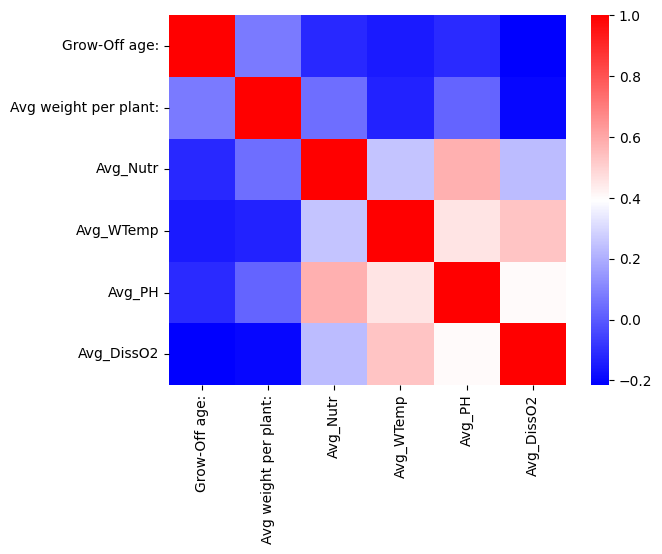

In [411]:
import seaborn as sns

# Heatmap of pairwise correlations
correlation_matrix = data_n2.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

## Modelling

In [444]:
#Encoding the features
ohe = OneHotEncoder(sparse = False) 
ohe.fit(data_n2[['Black heart severity:']]) 

data_n2[ohe.get_feature_names_out()] = ohe.transform(data_n2[['Black heart severity:']])

X = data_n2.drop(columns = ["Black heart severity:"])

/var/folders/tk/7yqwh_tj6wj3gmqp0p20bnm80000gq/T/ipykernel_15103/1461394731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n2[ohe.get_feature_names_out()] = ohe.transform(data_n2[['Black heart severity:']])


In [445]:
ohe = OneHotEncoder(sparse = False) 
ohe.fit(X[['Product:']]) 

X[ohe.get_feature_names_out()] = ohe.transform(X[['Product:']])

X2 = X.drop(columns = ["Product:"])
# Instantiate model

In [451]:
lin_reg = LinearRegression() 

y2 = X2['Avg weight per plant:']
X2 = X2.drop(columns=['Avg weight per plant:'])

# Scoring on multiple folds aka Cross Validation
scores_weight = cross_val_score(lin_reg, X2, y2, cv=5)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [450]:
scores_weight.mean()

-3.257161180658308e+23

In [448]:
# Show the dataset
minmax_scaler = RobustScaler()

X2 = minmax_scaler.fit_transform(X2)

In [449]:
lin_reg = LinearRegression() 
scores_weight = cross_val_score(lin_reg, X2, y2, cv=5)
scores_weight.mean()

-3.257161180658308e+23

 Looking at target as weight

In [428]:
# Encoding the target

target_encoder = LabelEncoder().fit(data_n2['Black heart severity:']) 
y1 = target_encoder.transform(data_n2['Black heart severity:'])
# Defining the features
X1 = data_n2.drop(columns=['Black heart severity:'])

In [429]:
ohe = OneHotEncoder(sparse = False) 
ohe.fit(X1[['Product:']]) 

X[ohe.get_feature_names_out()] = ohe.transform(X1[['Product:']])

X1 = X1.drop(columns = ["Product:"])
# Instantiate model

In [431]:
# Instantiate model
log_reg = LogisticRegression(max_iter=1000) 

# Scoring on multiple folds aka Cross Validation
scores_bh = cross_val_score(log_reg, X1, y1)
scores_bh

array([1., 1., 1., 1., 1.])

In [435]:
minmax_scaler = StandardScaler()

X1= minmax_scaler.fit_transform(X1)

log_reg = LogisticRegression(max_iter=1000) 
scores_bh = cross_val_score(log_reg, X1, y1, scoring='accuracy')
scores_bh

array([1., 1., 1., 1., 1.])

In [404]:
X1

array([[0.26315789, 0.47400898, 0.5290815 , ..., 0.        , 0.        ,
        1.        ],
       [0.26315789, 0.40781601, 0.5290815 , ..., 0.        , 0.        ,
        1.        ],
       [0.26315789, 0.1421092 , 0.5290815 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.31578947, 0.57909499, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.31578947, 0.51084518, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.42183994, 0.02077776, ..., 0.        , 1.        ,
        0.        ]])

## New heading